# Campbell&ndash;Shiller decomposition of U.S. stock returns

The Capmbell&ndash;Shiller decomposition is a linear approximation of an
accounting identity (under a transversality condition) that relates the
logarithm of the current price dividend ratio to present discounted value of
future dividend growth rates and future returns:
    
\begin{equation}
z_{t}=\sum_{j=1}^{\infty }\rho ^{j}g_{t+j}-\sum_{j=1}^{\infty }\rho
^{j}r_{t+j}
\end{equation}

where

\begin{equation*}
z_{t}=\log \frac{Q_{t}}{G_{t}}\qquad g_{t+1}=\log \frac{G_{t+1}}{G_{t}}%
\qquad r_{t+1}=\log R_{t+1}
\end{equation*}

and the constant $\rho $ is given by

\begin{equation*}
\rho =\frac{\exp \left( \bar{z}\right) }{\exp \left( \bar{z}\right) +1}
\end{equation*}

where $\bar{z}$ is the logarithm of the steady state price dividend ratio,
which we can set to $\bar{z}=\log E\left[ Q_{t}/G_{t}\right] $.

We are interested in understanding whether movements in the price-dividend
ratio are more associated with changes in future returns or future growth
rates. For that, we compute the covariance of the first equation with $z_{t}$ itself, to obtain

\begin{equation*}
Var\left( z_{t}\right) =Cov\left( z_{t},\sum_{j=1}^{\infty }\rho
^{j}g_{t+j}\right) +Cov\left( z_{t},-\sum_{j=1}^{\infty }\rho
^{j}r_{t+j}\right)
\end{equation*}

The equation states that the total unconditional variance of the price-dividend ratio can be decomposed into comovement of the price-dividend ratio with future dividend growth (the first term on the right-hand side), and comovement of the price-dividend ratio with the negative of future discounted returns (the second term on the right-hand side).

This decomposition provides a rationalization of movements in the stock market valuation. Since the price dividend ratio $z_{t}=\log \frac{Q_{t}}{G_{t}}$ appears to be stationary in the data, unusually high or low values of $z_t$ should be followed, on average, by mean reversion to its long-term average.

This can happen in two ways. Either dividend growth $g_{t+j}$ will be <b>higher</b> than usual, which generates <b>positive</b> comovement between the price-dividend ratio and future dividend growth, and the first covariance on the right-hand side will be large. The price-dividend ratio $z_t$ declines in the future because $G_t$ in the denominator grows faster. Or future returns $r_{t+j}$ will be <b>lower</b> than usual, which generates a <b>negative</b> comovement between the price dividend ratio and future returns, and the second covariance on the right-hand side will be large. The price-dividend ratio $z_t$ declines in the future because $Q_t$ in the numerator grows more slowly.

Both channels operate in practice but we want to see, which one is the more prevalent one. In other words, are stock prices typically high because they reflect anticipation of high dividend growth in the future, or are high stock prices followed by low returns?

Dividing this equation by $Var\left( z_{t}\right) $ then yields a convenient normalization

\begin{equation*}
1=\frac{Cov\left( z_{t},\sum_{j=1}^{\infty }\rho ^{j}g_{t+j}\right) }{%
Var\left( z_{t}\right) }+\frac{Cov\left( z_{t},-\sum_{j=1}^{\infty }\rho
^{j}r_{t+j}\right) }{Var\left( z_{t}\right) }.
\end{equation*}

The two terms on the right hand side tell us what percentage of total variation in the price-dividend ratio is attributable to changes in future dividend growth and to changes in future returns.

Observe that the equation involves an infinite sum of future returns. In order to implement this equation empirically, we need to compute a finite-horizon counterpart of this decomposition for horizon $J$

\begin{equation}
1=\frac{Cov\left( z_{t},\sum_{j=1}^{J}\rho ^{j}g_{t+j}\right) }{Var\left(
z_{t}\right) }+\frac{Cov\left( z_{t},-\sum_{j=1}^{J}\rho ^{j}r_{t+j}\right)
}{Var\left( z_{t}\right) } +\frac{Cov\left( z_{t},\rho ^{J}z_{t+J}\right)
}{Var\left( z_{t}\right) }.
\end{equation}

The last term on the right-hand side should converge to zero as $J\to \infty$.

We can now compute all terms on the right-hand side in the data. For every date $t$, record the truncated discounted sum of future dividend growth, the truncated discounted sum of future returns, and then compute the unconditional covariance with the price-dividend ratio.

## Implementation

We implement the decomposition using data from <a href="http://www.econ.yale.edu/~shiller/data.htm">Robert Shiller website</a>.

Define the local folder where graphs will be stored, and from which data will be retrieved. If you are running the notebook within Google Colab, use the second option.

In [1]:
graphfolder = "graphs/"
datafolder = "data/"

# options for Google Colab (uncomment the following lines)
# graphfolder = "gdrive/MyDrive/graphs/"
# datafolder = "gdrive/MyDrive/data/"

Import relevant packages.

In [2]:
# render graphs within notebook - may want to uncomment the next line for older versions of Jupyter
# %matplotlib inline

# import packages
import numpy as np
import requests
import pandas as pd
import pandas_datareader as pdr
from io import BytesIO
from scipy import stats
from scipy import optimize

# load econutil package with some frequently used functions
import econutil as ec

Root package econutil imported.


Download and process price and dividend data.

In [3]:
# download data from Robert Shiller's website
# old version data_Shiller = pd.read_excel("http://www.econ.yale.edu/~shiller/data/ie_data.xls",sheet_name="Data",header=7)
data_Shiller = pd.read_excel("https://img1.wsimg.com/blobby/go/e5e77e0b-59d1-44d9-ab25-4763ac982e53/downloads/423556dc-a15c-4714-b32e-de9e2cb8173d/ie_data.xls?ver=1735912576408",sheet_name="Data",header=7)

In [4]:
# process data
data = data_Shiller[["Date","Price","Dividend","Price.1","Earnings"]]
data.columns = ["Date","Price","Dividend","Cumulative Return","Earnings"]
data = data[~np.isnan(data["Price"] + data["Dividend"] + data["Cumulative Return"])]
data.insert(5,"PD ratio",data["Price"]/(data["Dividend"]/12))

First plot the data.

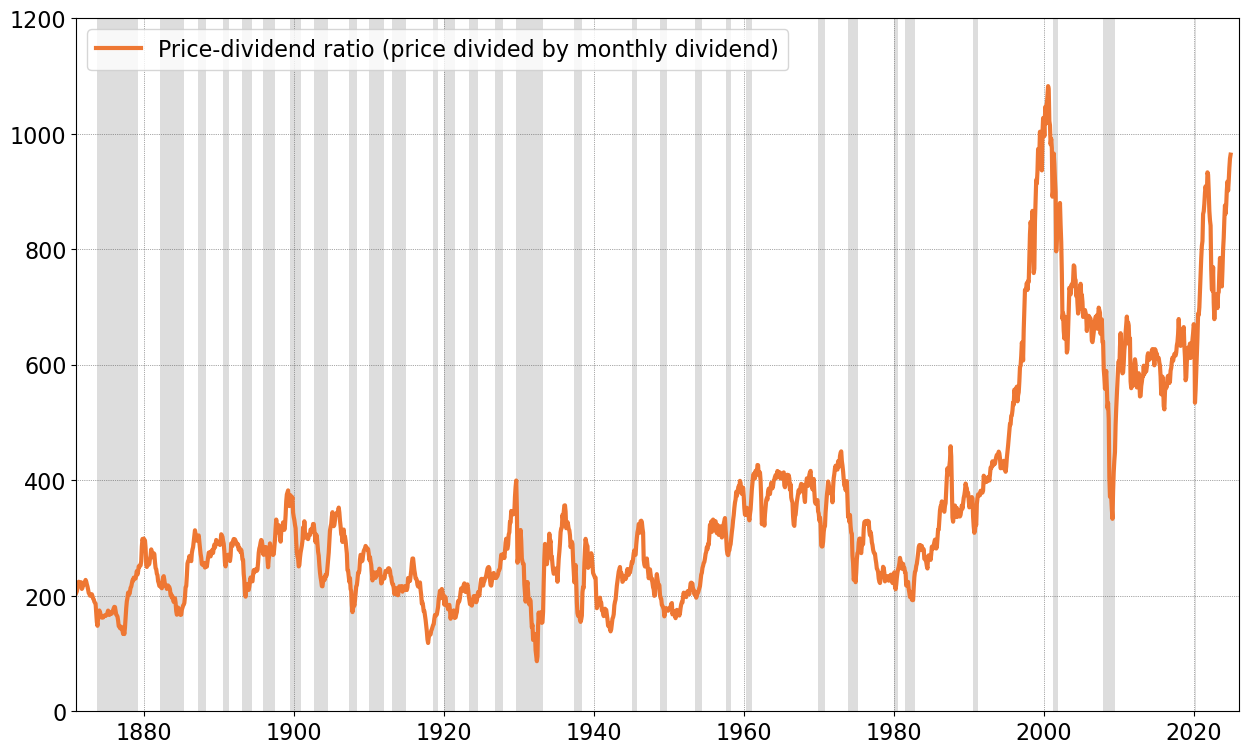

In [5]:
fig_param = {'figsize' : [15,9], 'fontsize': 16, 'subplots': [1,1],
         'title': '',
         'xlim': [1871,2026], 'ylim': [0,1200],
         'xlabel': '', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': False,
         'showNBERrecessions' : True, 'showNBERrecessions_y': [0,1200]}
    
fig,ax = ec.GenerateTSPlot(fig_param)

ax.plot(data["Date"]//1 + ((data["Date"]%1 * 100)-1)/12,data["PD ratio"],
             linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='Price-dividend ratio (price divided by monthly dividend)')
ax.legend(loc="upper left")

fig.savefig(graphfolder + 'perturbation_campbell_shiller_PD_ratio.pdf',bbox_inches='tight')

Construct a function that produces the Cambell-Shiller decomposition.

In [6]:
def CS_decomposition(data,Jmax):
    
    R = np.float64(data.loc[data.index[1:],"Cumulative Return"]) / np.float64(data.loc[data.index[0:-1],"Cumulative Return"])
    G = np.float64(data.loc[data.index[1:],"Dividend"]) / np.float64(data.loc[data.index[0:-1],"Dividend"])
    Z = np.float64(data["PD ratio"])

    r = np.log(R)
    g = np.log(G)
    z = np.log(Z)
    
    T = len(R)

    c_g, c_r, c_z = np.zeros(Jmax), np.zeros(Jmax), np.zeros(Jmax)

    rho = Z.mean() / (Z.mean() + 1)
    rho_series = rho ** np.linspace(0,Jmax,Jmax+1)

    partsum_g = np.zeros(T)
    partsum_r = np.zeros(T)


    for J in range(Jmax):
        for t in range(T-J):
            partsum_g[t] = sum(rho_series[1:J+2]*g[t:t+J+1])
            partsum_r[t] = sum(rho_series[1:J+2]*r[t:t+J+1])
    
        var_z = z[0:T-J].var()
        
        # comovement with future dividend growth
        c_g[J] = np.cov([z[:T-J],partsum_g[:T-J]])[0,1] / var_z
        # comovement with future returns
        c_r[J] = np.cov([z[:T-J],-partsum_r[:T-J]])[0,1] / var_z
        # comovement with future price-dividend ratio
        c_z[J] = np.cov([z[:T-J],z[J:T]])[0,1] / var_z
    
    return c_g, c_r, c_z

Construct the decomposition for two different samples, one that includes all data, and one that includes data only until 1990.

In [7]:
# maximum number of terms in the partial sum for future discounted returns and dividend growth rates
Jmax = 300

c_g, c_r, c_z = CS_decomposition(data,Jmax)
c_g_shorter, c_r_shorter, c_z_shorter = CS_decomposition(data[data["Date"] < 1990],Jmax)

Plot decompositions.

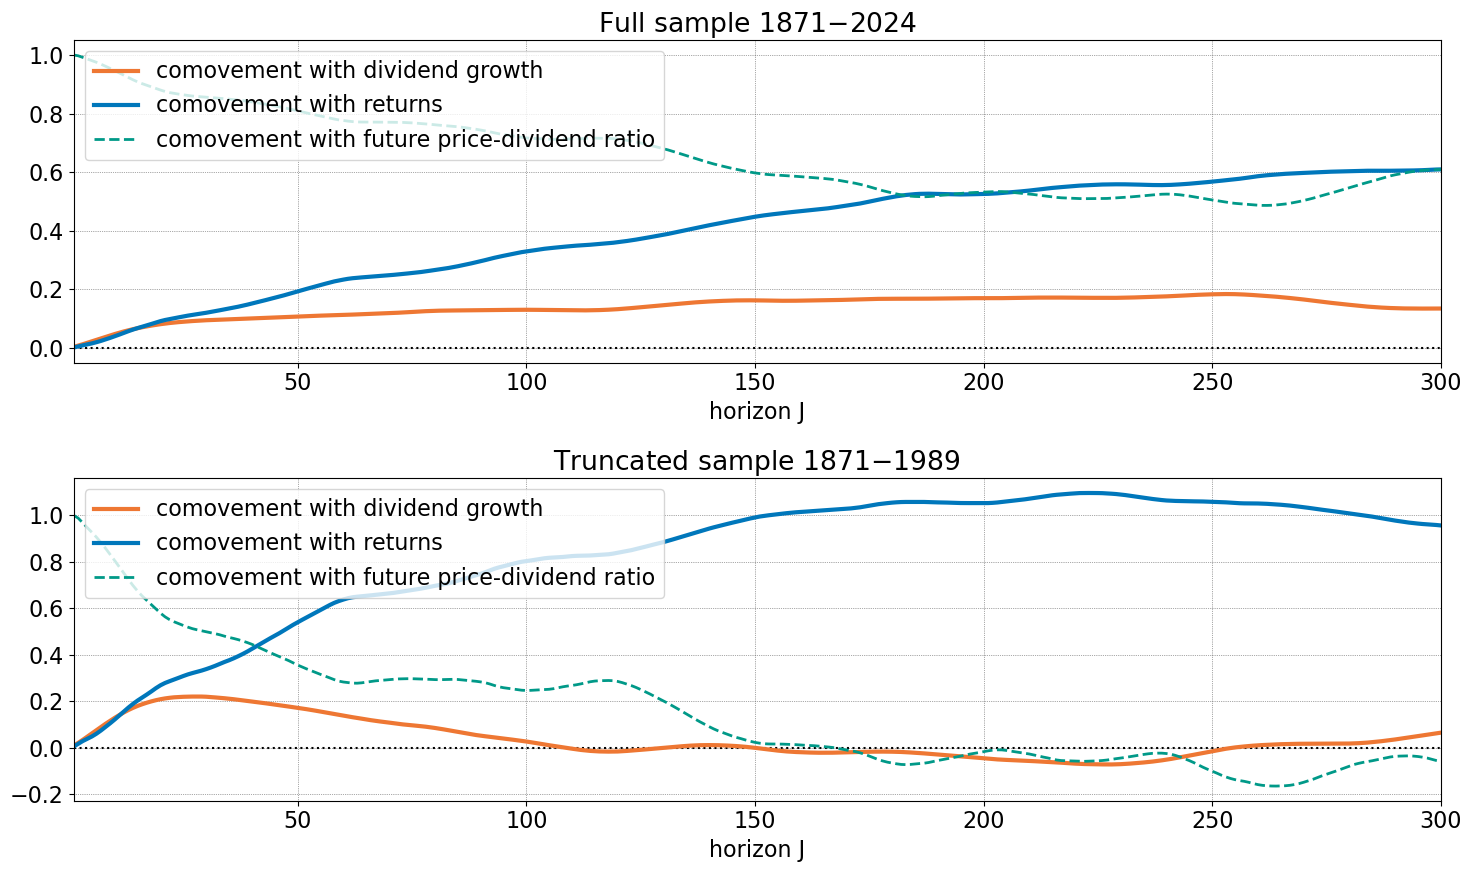

In [8]:
fig_param = {'figsize' : [15,9], 'fontsize': 16, 'subplots': [2,1],
         'title': '',
         'xlim': [1,Jmax], 'ylim': [0,0],
         'xlabel': 'horizon J', 'ylabel': '',
         'ylogscale': False,
         'showgrid': True, 'highlightzero': True,
         'showNBERrecessions' : False, 'showNBERrecessions_y': [0,1200]}
    
fig,ax = ec.GenerateTSPlot(fig_param)

ax[0,0].plot(np.linspace(1,Jmax,Jmax),c_g,linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='comovement with dividend growth')
ax[0,0].plot(np.linspace(1,Jmax,Jmax),c_r,linewidth=3,color=ec.tolColor['tolVibrantBlue'],label='comovement with returns')
ax[0,0].plot(np.linspace(1,Jmax,Jmax),c_z,linewidth=2,linestyle='--',color=ec.tolColor['tolVibrantTeal'],label='comovement with future price-dividend ratio')
ax[0,0].set_title(f'Full sample {int(data.loc[0,"Date"]//1)}$-${int(data.loc[data.index[-1],"Date"]//1)}')
ax[0,0].legend(loc="upper left")

ax[1,0].plot(np.linspace(1,Jmax,Jmax),c_g_shorter,linewidth=3,color=ec.tolColor['tolVibrantOrange'],label='comovement with dividend growth')
ax[1,0].plot(np.linspace(1,Jmax,Jmax),c_r_shorter,linewidth=3,color=ec.tolColor['tolVibrantBlue'],label='comovement with returns')
ax[1,0].plot(np.linspace(1,Jmax,Jmax),c_z_shorter,linewidth=2,linestyle='--',color=ec.tolColor['tolVibrantTeal'],label='comovement with future price-dividend ratio')
ax[1,0].set_title(f'Truncated sample {int(data.loc[0,"Date"]//1)}$-${int(data[data["Date"] < 1990].loc[data[data["Date"] < 1990].index[-1],"Date"]//1)}')
ax[1,0].legend(loc="upper left")

fig.tight_layout()
fig.savefig(graphfolder + 'perturbation_campbell_shiller_decomposition.pdf',bbox_inches='tight')